In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# 1. LOAD DATASET
df = pd.read_csv("heart_attack_prediction_dataset.csv")

In [19]:
# 2. CLEANING — Keep only 2000 rows

df_clean = df.head(2000)

# Save new CSV
df_clean.to_csv("heart_attack_clean_2000.csv", index=False)

# Reload cleaned dataset
df2 = pd.read_csv("heart_attack_clean_2000.csv")

In [20]:
df2 

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NCT0505,68,Male,275,159/98,79,1,1,1,1,...,5.420045,294730,36.893260,96,5,7,Colombia,South America,Northern Hemisphere,1
1996,PPX9804,28,Female,341,170/79,54,1,0,0,0,...,7.092913,238557,36.736483,171,2,8,Japan,Asia,Northern Hemisphere,1
1997,VQI1338,33,Female,270,148/86,84,1,0,0,0,...,7.419818,107231,22.504744,644,1,8,India,Asia,Northern Hemisphere,0
1998,ZQH2341,42,Male,176,106/108,55,0,1,1,0,...,2.395421,52074,38.235511,477,6,10,Spain,Europe,Southern Hemisphere,0


In [31]:
# 3. DROP SPECIFIED COLUMNS

cols_to_drop = [
    "Patient ID", "Income", "Country", "Alcohol Consumption", "Continent",
    "Hemisphere", "Physical Activity Days Per Week", "BMI", 
    "Sedentary Hours Per Day"
]

df2 = df2.drop(columns=[c for c in cols_to_drop if c in df2.columns])

In [32]:
df2 

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Triglycerides,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,4.168189,Average,0,0,9,286,6,0
1,21,Male,389,165/93,98,1,1,1,1,1.813242,Unhealthy,1,0,1,235,7,0
2,21,Female,324,174/99,72,1,0,0,0,2.078353,Healthy,1,1,9,587,4,0
3,84,Male,383,163/100,73,1,1,1,0,9.828130,Average,1,0,9,378,4,0
4,66,Male,318,91/88,93,1,1,1,1,5.804299,Unhealthy,1,0,6,231,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,68,Male,275,159/98,79,1,1,1,1,9.159695,Healthy,1,1,7,96,7,1
1996,28,Female,341,170/79,54,1,0,0,0,16.718402,Healthy,0,1,10,171,8,1
1997,33,Female,270,148/86,84,1,0,0,0,5.301930,Unhealthy,0,0,8,644,8,0
1998,42,Male,176,106/108,55,0,1,1,0,12.956947,Unhealthy,0,0,3,477,10,0


In [34]:
print(df2.columns)

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Triglycerides', 'Sleep Hours Per Day', 'Heart Attack Risk'],
      dtype='object')


In [35]:
# 4. STANDARDIZE COLUMN NAMES

df2.columns = (
    df2.columns.str.strip()
               .str.lower()
               .str.replace(" ", "_")
)

In [36]:
df2

,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,triglycerides,sleep_hours_per_day,heart_attack_risk
0,67,Male,208,158/88,72,0,0,1,0,4.168189,Average,0,0,9,286,6,0
1,21,Male,389,165/93,98,1,1,1,1,1.813242,Unhealthy,1,0,1,235,7,0
2,21,Female,324,174/99,72,1,0,0,0,2.078353,Healthy,1,1,9,587,4,0
3,84,Male,383,163/100,73,1,1,1,0,9.828130,Average,1,0,9,378,4,0
4,66,Male,318,91/88,93,1,1,1,1,5.804299,Unhealthy,1,0,6,231,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,68,Male,275,159/98,79,1,1,1,1,9.159695,Healthy,1,1,7,96,7,1
1996,28,Female,341,170/79,54,1,0,0,0,16.718402,Healthy,0,1,10,171,8,1
1997,33,Female,270,148/86,84,1,0,0,0,5.301930,Unhealthy,0,0,8,644,8,0
1998,42,Male,176,106/108,55,0,1,1,0,12.956947,Unhealthy,0,0,3,477,10,0


In [37]:
# 5. ENCODE SEX COLUMN

if "sex" in df2.columns:
    df2["sex"] = df2["sex"].map({"Male": 1, "Female": 0})
df2

,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,triglycerides,sleep_hours_per_day,heart_attack_risk
0,67,1,208,158/88,72,0,0,1,0,4.168189,Average,0,0,9,286,6,0
1,21,1,389,165/93,98,1,1,1,1,1.813242,Unhealthy,1,0,1,235,7,0
2,21,0,324,174/99,72,1,0,0,0,2.078353,Healthy,1,1,9,587,4,0
3,84,1,383,163/100,73,1,1,1,0,9.828130,Average,1,0,9,378,4,0
4,66,1,318,91/88,93,1,1,1,1,5.804299,Unhealthy,1,0,6,231,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,68,1,275,159/98,79,1,1,1,1,9.159695,Healthy,1,1,7,96,7,1
1996,28,0,341,170/79,54,1,0,0,0,16.718402,Healthy,0,1,10,171,8,1
1997,33,0,270,148/86,84,1,0,0,0,5.301930,Unhealthy,0,0,8,644,8,0
1998,42,1,176,106/108,55,0,1,1,0,12.956947,Unhealthy,0,0,3,477,10,0


In [38]:
# 6. KEEP ONLY NUMERIC COLUMNS (fixes ML errors)

df_num = df2.select_dtypes(include=["number"])
df_num

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,exercise_hours_per_week,previous_heart_problems,medication_use,stress_level,triglycerides,sleep_hours_per_day,heart_attack_risk
0,67,1,208,72,0,0,1,0,4.168189,0,0,9,286,6,0
1,21,1,389,98,1,1,1,1,1.813242,1,0,1,235,7,0
2,21,0,324,72,1,0,0,0,2.078353,1,1,9,587,4,0
3,84,1,383,73,1,1,1,0,9.828130,1,0,9,378,4,0
4,66,1,318,93,1,1,1,1,5.804299,1,0,6,231,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,68,1,275,79,1,1,1,1,9.159695,1,1,7,96,7,1
1996,28,0,341,54,1,0,0,0,16.718402,0,1,10,171,8,1
1997,33,0,270,84,1,0,0,0,5.301930,0,0,8,644,8,0
1998,42,1,176,55,0,1,1,0,12.956947,0,0,3,477,10,0


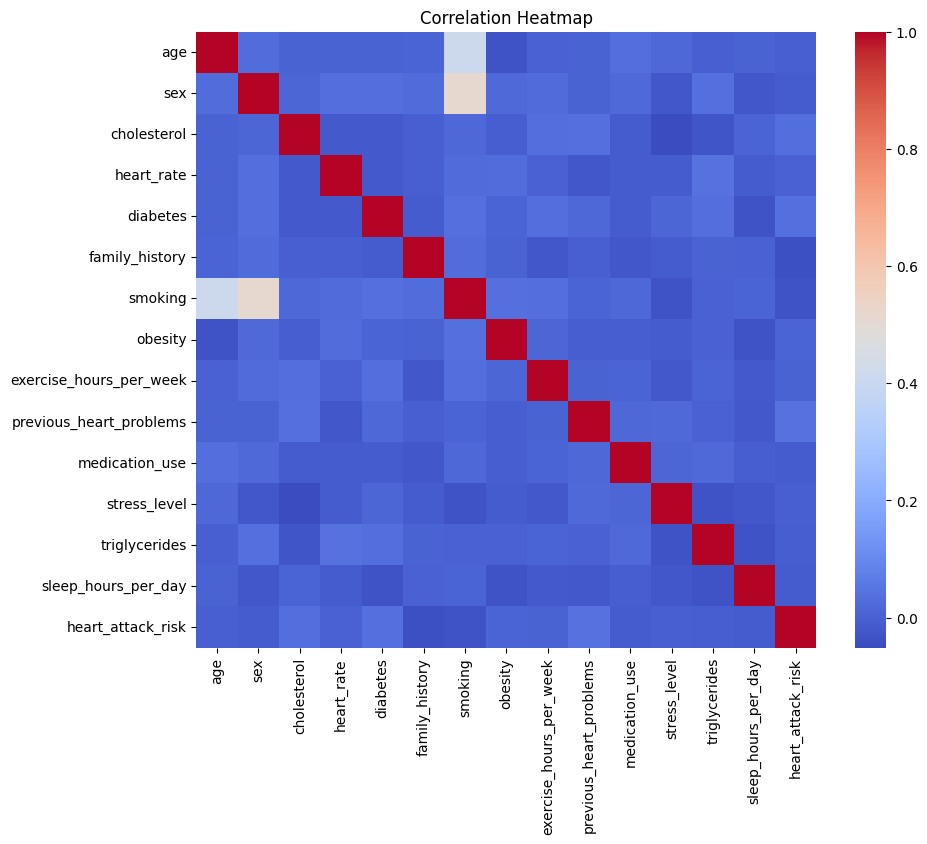

In [39]:
# 7. EDA (Exploratory Data Analysis)
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [40]:
# 8. TRAIN/VALIDATION/TEST SPLIT (70/10/20)

# Choose target (last numeric column)
target_col = df_num.columns[-1]

y = df_num[target_col]
X = df_num.drop(columns=[target_col])

# 70% Train, 30% Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# From 30% → 10% Validation + 20% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, random_state=42
)

print("Train Shape:", X_train.shape)
print("Validation Shape:", X_val.shape)
print("Test Shape:", X_test.shape)

Train Shape: (1400, 14)
Validation Shape: (200, 14)
Test Shape: (400, 14)


In [41]:
# 9. LINEAR REGRESSION MODEL

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
# 10. MODEL EVALUATION

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Performance ---")
print("Mean Squared Error:", mse)
print("R² Score:", r2)


--- Model Performance ---
Mean Squared Error: 0.23524626893505793
R² Score: -0.030680003001431144


In [43]:
# 11. SHOW MODEL COEFFICIENTS

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\n--- Feature Coefficients ---")
print(coeff_df)


--- Feature Coefficients ---
                    Feature  Coefficient
0                       age     0.000213
1                       sex    -0.023537
2               cholesterol     0.000280
3                heart_rate     0.000274
4                  diabetes     0.024423
5            family_history    -0.062756
6                   smoking    -0.053961
7                   obesity    -0.008676
8   exercise_hours_per_week     0.001630
9   previous_heart_problems     0.048108
10           medication_use    -0.012670
11             stress_level    -0.003236
12            triglycerides    -0.000055
13      sleep_hours_per_day    -0.006822


In [8]:
df2

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,triglycerides,sleep_hours_per_day,heart_attack_risk
0,BMW7812,67,1,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,286,6,0
1,CZE1114,21,1,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,235,7,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,587,4,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,378,4,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,231,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NCT0505,68,1,275,159/98,79,1,1,1,1,1,9.159695,Healthy,1,1,7,96,7,1
1996,PPX9804,28,0,341,170/79,54,1,0,0,0,0,16.718402,Healthy,0,1,10,171,8,1
1997,VQI1338,33,0,270,148/86,84,1,0,0,0,1,5.301930,Unhealthy,0,0,8,644,8,0
1998,ZQH2341,42,1,176,106/108,55,0,1,1,0,1,12.956947,Unhealthy,0,0,3,477,10,0
